Project Name: Diabetes Patients


Author: Joshua Kabwanga





# Introduction


This notebook explores patients from the National Institute of Diabetes, Digestive and Kidney Diseases.


# Abount the Analysis


The primary goal of this analysis is to provide insight based on the patient information that's been provided in the dataset and predict whether a patient has diabetes based on certain diagnostic measurements included in the project.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are female, with only one dependent variable (outcome).




# Dataset


The diabetes dataset contains detailed information about all the patients, such as age, pregnancy, glucose, blood pressure, skin thickness, insulin, and BMI.
The dataset is a CSV file that contains 768 rows and 9 columns.


#Steps taken
The first step we took was to understand the structure of the data and identify specific research questions that we wanted to explore using the dataset. We imported the necessary libraries and loaded the dataset into Python.


This is followed by data cleaning by checking missing values, checking duplicated values, and checking data types. and replace the **0 value** in the BMI, blood pressure, insulin, skin thickness, and glucose with the mean value.
After that, I understand that it doesn't make sense for the above column to have a zero value.





#Load packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Read the dataset

df = pd.read_csv("diabetes.csv")


**Getting to know the dataset**

The first 5 rows of the dataset

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The Last 5 rows of the dataset

In [5]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


The function `shape` returns the shape of an array. The shape is a tuple of integers. These numbers denote the lengths of the corresponding array dimension. so in this dataset we have 768 rows and 9 colomns.

In [6]:
#dimension of the dataset
df.shape

(768, 9)

In [7]:
#Check the number of null value in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Quantity value of the duplicate
df.duplicated().sum()

0

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

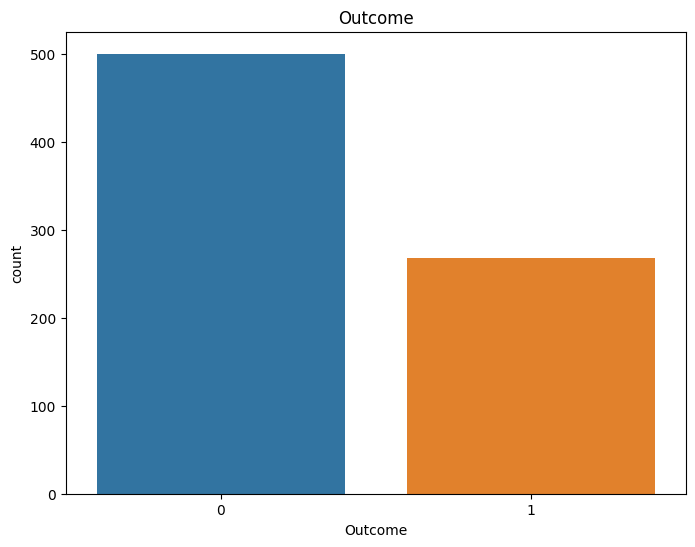

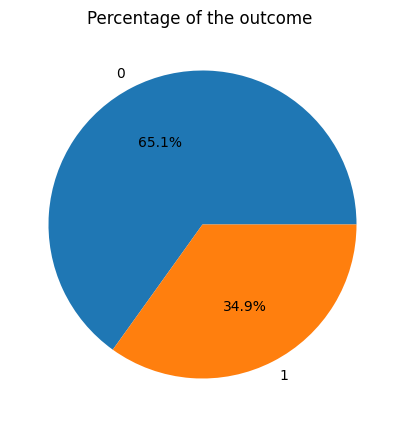

In [10]:
#Count plot of the outcome
plt.figure(figsize=(8,6))
sns.countplot(x = 'Outcome', data=df, )
plt.title('Outcome')
plt.show()


#Pie chart that calculate the % of the outcome column
labels=['0','1']

df1 = df['Outcome'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(df1, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of the outcome ')
plt.show()

The counter chart shows that cases of people with diabetes are more  with 65.1% than people without diabetes

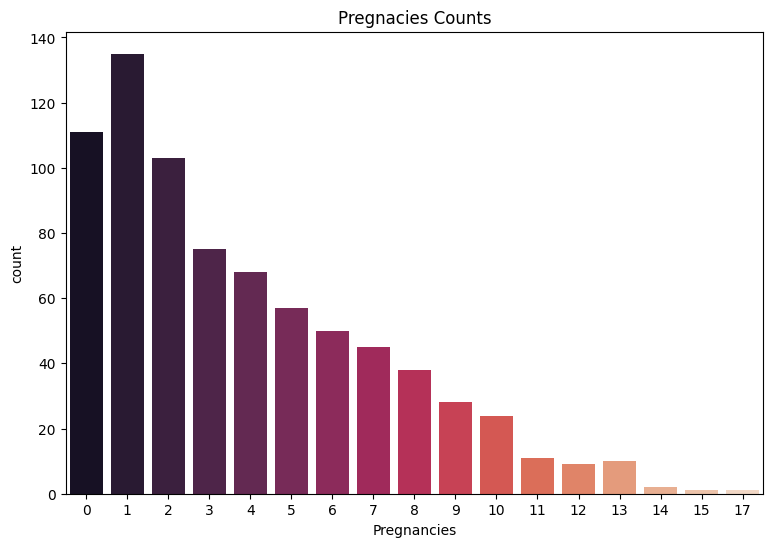

In [11]:
#The number of pregnancies in the dataset

plt.figure(figsize=(9,6))
sns.countplot(x='Pregnancies', data = df, palette="rocket")
plt.title("Pregnacies Counts")
plt.show()

The above bar chart explains the distributions of the number of pregnancies in the dataset.

This describes that the woman with 1 pregnancy  counts 135 cases in  the dataset, after women that never been pregnant with 111 counts, after 2 cases with 103 counts and more, last we have 1 count with 17 cases of pregnancies

In [12]:
#statistic descriptive
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [13]:
#here few misconception is there like BMI can not be zero, Bloid Pressure can't be also zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero with the mean values of the following columns

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [14]:
#Double check
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


Result

There are 768 records in the dataset.

Well done but the zero value from the columns Glucose, Insulin, skin thickness, BMI and Blood Pressure will be replace with the mean values. since it's impossible to have zero value from the above columns.

<Axes: >

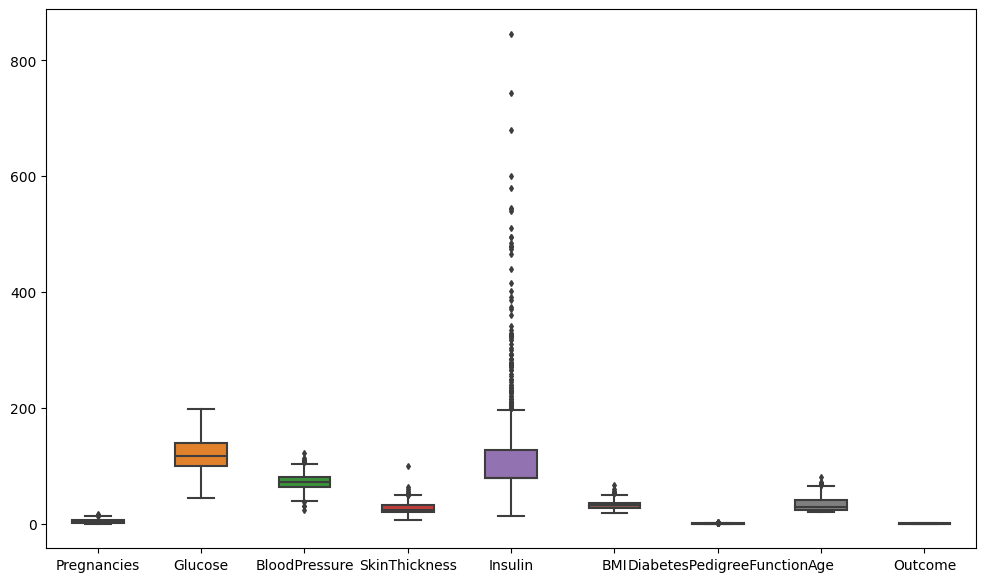

In [15]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it

fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

**A quick view of what insulin is and functions in the body**


[***Insulin***](https://https://kidshealth.org/en/parents/insulin.html#:~:text=Insulin%20is%20a%20hormone%20that,or%20stored%20for%20future%20use.) is a hormone that lowers the level of glucose (a type of sugar) in the blood. It's made by the beta cells of the pancreas and released into the blood when the glucose level goes up, such as after eating. Insulin helps glucose enter the body's cells, where it can be used for energy or stored for future use

I will leave the outliers as it's,   Maybe there are some explanations why it's there.


# Histogram distribution of numeric column

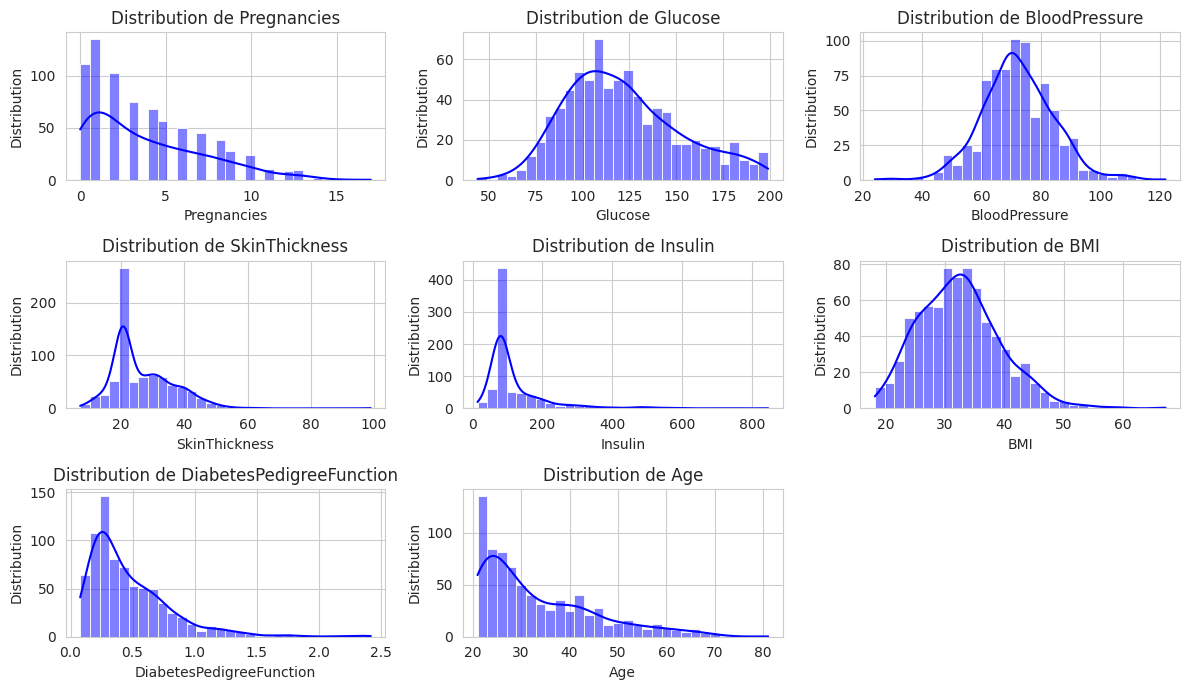

In [16]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,7))
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], bins=30, kde=True , color="blue")
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

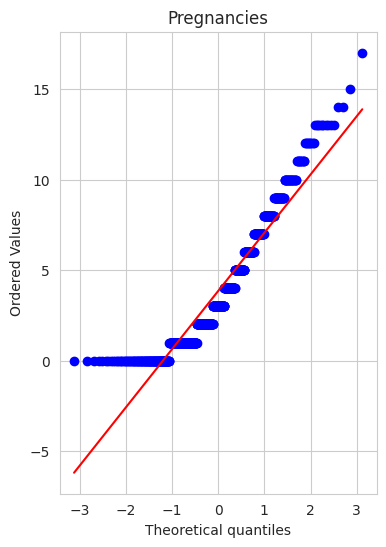

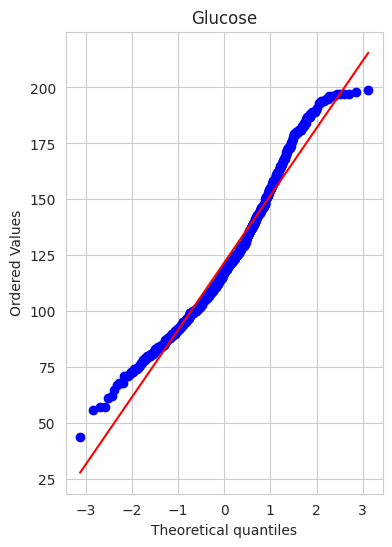

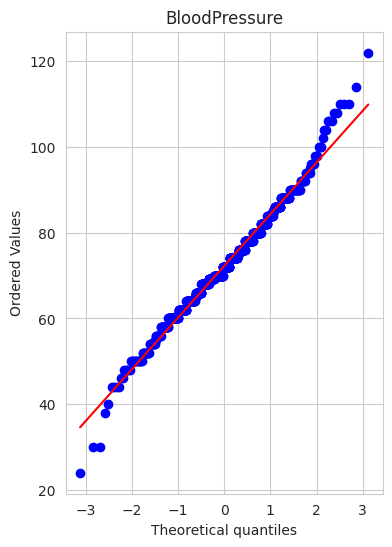

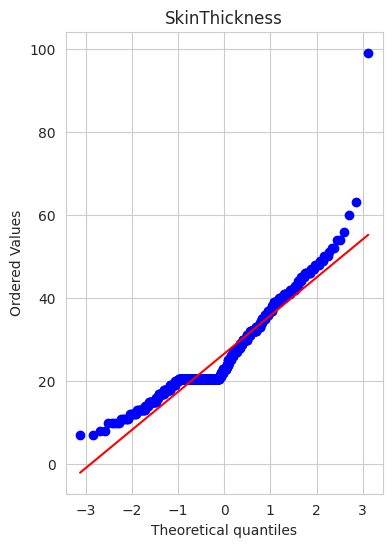

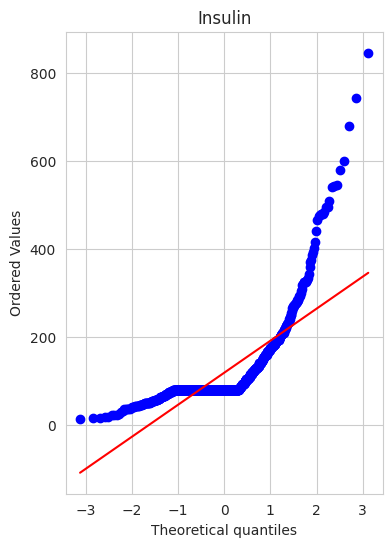

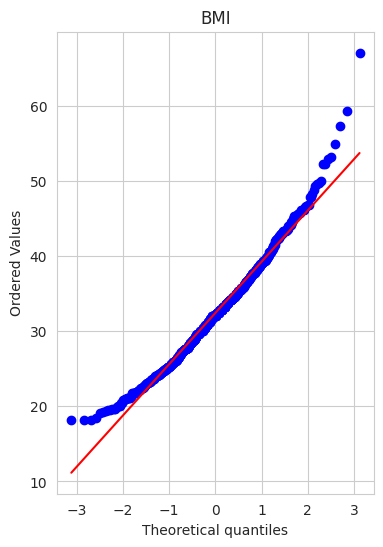

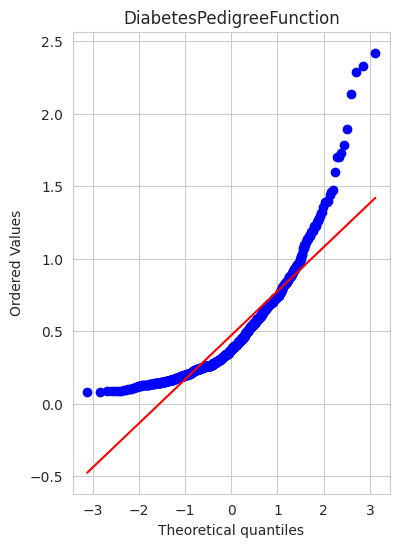

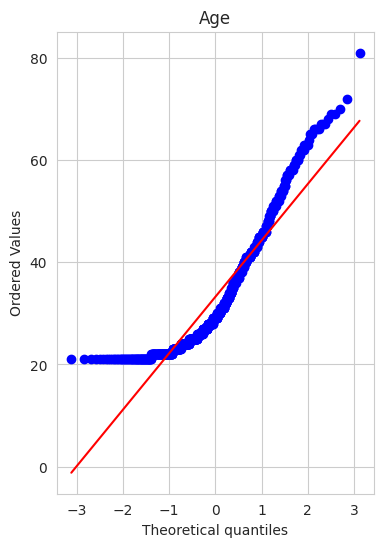

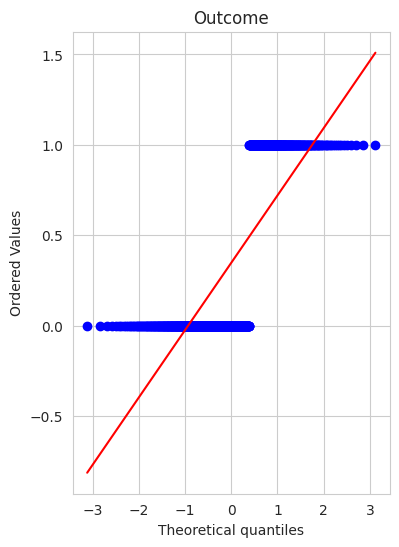

In [17]:
import scipy.stats as stats
import pylab

num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols, variable):
    plt.figure(figsize=(9,6))
    plt.subplot(1, 2, 1)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

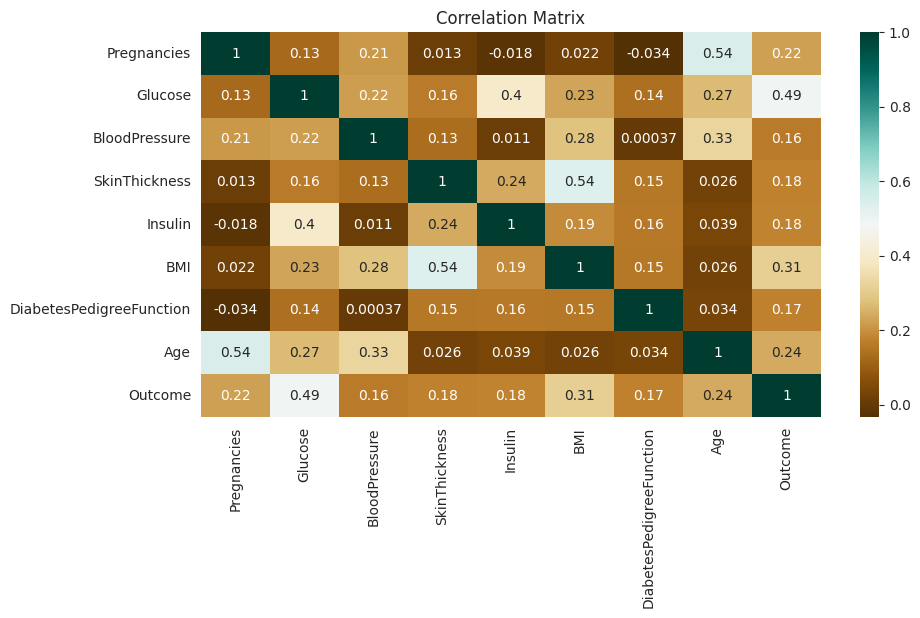

In [18]:
#Correlation Matrix

plt.figure(figsize=(10,5))
data= df.corr()
sns.heatmap(data,cmap="BrBG",annot=True)
plt.title("Correlation Matrix")
plt.show()


Result

* Outcome has a moderate positive correlation with Glucose, which makes sense as glucose levels are a direct indicator of diabetes.

* Age and pregnancies are positively correlated. this is expected since as age increases, the number of pregnancies for a woman can also increase.

* Skin Thickness and BMI are positively correlated. A higher Body mass index might be associated with thicker skin.






# **ML model**

In [19]:
X = df.drop(['Outcome'], axis=1)
Y = df['Outcome']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [21]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions=dtc.predict(X_test)

**Result**

In [22]:
print("Accuracy Score :",accuracy_score(y_test,predictions))
print("Classification Report \n",classification_report(y_test,predictions))

Accuracy Score : 0.7532467532467533
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       107
           1       0.58      0.68      0.63        47

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.75      0.76       154



# Print the plot

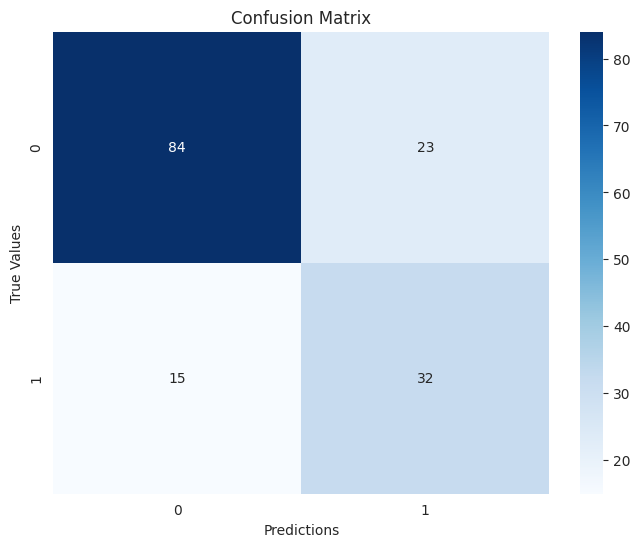

In [23]:
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

#**2 Model ML**
# Scaling


Scaling is the process of scaling data features. Data features can be measured in different ranges or units, which can be important for machine learning algorithms. For example, suppose there are two features in a dataset: "age" and "income". Age values can be measured in a range of 0-100, while income values can vary from thousands of dollars to hundreds of thousands of dollars. In this case, machine learning algorithms may give more importance to the income feature and ignore the effect of the age feature. Therefore, when scaling data features, each feature is transformed to be on the same scale. This process allows the data set to be properly analyzed and more accurate predictions to be made. Scaling can be performed using different methods such as standardization, normalization, or min-max scaling.

In [24]:

!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [25]:
from catboost import CatBoostClassifier


X =  df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [27]:

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision, recall, f1, _ = precision_recall_fscore_support(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

In [28]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.7720
- Precision: 0.7666
- Recall: 0.7720
- F1 Score: 0.7639
----------------------------------
Model performance for Test set
- Accuracy: 0.7792
- Precision: 0.7764
- Recall: 0.7792
- F1 Score: 0.7772


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7273
- Precision: 0.7322
- Recall: 0.7273
- F1 Score: 0.7292


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7468
- Precision: 0.7478
- Recall: 0.7468
- F1 Score: 0.7473


Support Vector Machine
Model performance for Training set
- Accuracy: 0.7638
- Precision: 0.7649
- Recall: 0.7638
- F1 Score: 0.7451
----------------------------------
Model performa